In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from sklearn.datasets import load_breast_cancer
cancer =  load_breast_cancer()
cancer.keys()
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [11]:
df =  pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [14]:
df.shape # we have 30 columns

(569, 30)

# 2. Normalize

In [19]:
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler()
df1.fit(df)
df1_norm = df1.transform(df)

In [21]:
df1_norm

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [22]:
from sklearn.decomposition import PCA

In [24]:
pca =  PCA(n_components=3) # How many PC you want

In [25]:
pca.fit(df1_norm) # fit to the normalize data

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
x_pca =  pca.transform(df1_norm)

In [28]:
df1_norm.shape # this is our normalize data which has 30 variables

(569, 30)

In [30]:
x_pca.shape # this is our data after applying PCA in normalize data

(569, 3)

Text(0, 0.5, 'pc2')

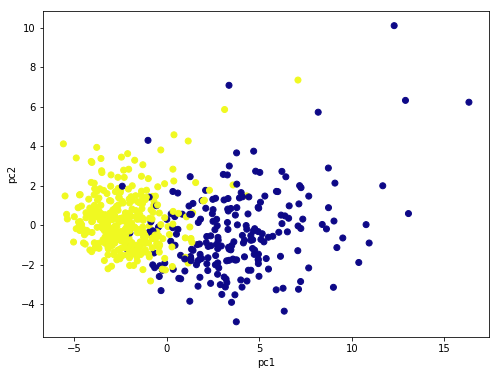

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,2], c= cancer['target'], cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')
# plot of 2 principal component

In [37]:
pca.components_ # Each row represents PC and columns represents the features

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970607, -0.21518136, -0.23107671,  0.18611301,
         0.15189162,  0.06016539, -0.03476748,  0.19034876,  0.36657551,
        -0.10555216,  0.08997966, -0.08945723, -0.15229263,  0.20443046,
         0.23271587,  0.19720728,  0.13032156,  0.18384802,  0.28009201,
        -0.21986639, -0.0454673 , -0.19987843, -0.21935186,  0.17230433,
         0.14359316,  0.09796412, -0.00825723,  0.14188334,  0.27533947],
       [-0.0085313 ,  0.06455036, -0.00931422,  0.02869959, -0.1042922 ,
        -0.07409123,  0.0027344 , -0.02556312, -0

In [38]:
pca.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291015])

In [39]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163])

In [42]:
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])

In [44]:
df_comp.T

,0,1,2
mean radius,0.218902,-0.233857,-0.008531
mean texture,0.103725,-0.059706,0.064550
mean perimeter,0.227537,-0.215181,-0.009314
mean area,0.220995,-0.231077,0.028700
mean smoothness,0.142590,0.186113,-0.104292
mean compactness,0.239285,0.151892,-0.074091
mean concavity,0.258400,0.060165,0.002734
mean concave points,0.260854,-0.034767,-0.025563
mean symmetry,0.138167,0.190349,-0.040240
mean fractal dimension,0.064363,0.366576,-0.022573


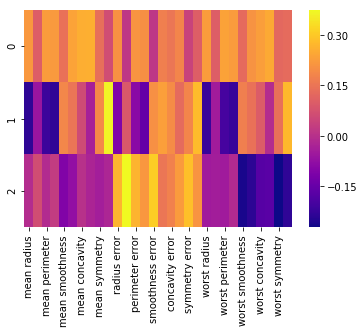

In [45]:
sns.heatmap(df_comp, cmap='plasma')